In [1]:
import pandas as pd

In [2]:
hr = pd.read_csv('G:\data\datasets\hr_data.csv')

In [3]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'is_smoker', 'department', 'salary'],
      dtype='object')

In [4]:
hr.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0,0.38,0.53,2,157.0,3.0,0,yes,0,NaN,sales,low
1,0.80,0.86,5,262.0,6.0,0,yes,0,yes,sales,medium
2,0.11,0.88,7,272.0,4.0,0,yes,0,NaN,sales,medium
3,0.72,0.87,5,223.0,5.0,0,yes,0,NaN,sales,low
4,0.37,0.52,2,NaN,NaN,0,yes,0,no,sales,low
5,0.41,0.50,2,NaN,NaN,0,yes,0,NaN,sales,low
6,0.10,0.77,6,247.0,4.0,0,yes,0,NaN,sales,low
7,0.92,0.85,5,259.0,5.0,0,yes,0,NaN,sales,low
8,0.89,1.00,5,224.0,5.0,0,yes,0,NaN,sales,low
9,0.42,0.53,2,142.0,3.0,0,yes,0,NaN,sales,low


In [5]:
hr.tail(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
14989,0.43,0.57,2,159.0,3.0,1,yes,0,NaN,technical,low
14990,0.89,0.88,5,228.0,5.0,1,yes,0,NaN,support,low
14991,0.09,0.81,6,257.0,4.0,0,yes,0,NaN,support,low
14992,0.40,0.48,2,155.0,3.0,0,yes,0,NaN,support,low
14993,0.76,0.83,6,293.0,6.0,0,yes,0,NaN,support,low
14994,0.40,0.57,2,151.0,3.0,0,yes,0,NaN,support,low
14995,0.37,0.48,2,160.0,3.0,0,yes,0,NaN,support,low
14996,0.37,0.53,2,143.0,3.0,0,yes,0,NaN,support,low
14997,0.11,0.96,6,280.0,4.0,0,yes,0,NaN,support,low
14998,0.37,0.52,2,158.0,3.0,0,yes,0,NaN,support,low


In [6]:
hr.shape

(14999, 11)

In [7]:
with open('G:\data\datasets\hr_data.csv') as f:
    print(len(f.read().splitlines()))

15000


0


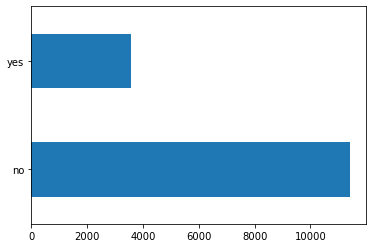

In [8]:

hr.left.value_counts().plot(kind ='barh')
print(hr.left.isnull().sum())

In [9]:
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours     float64
time_spend_company       float64
work_accident              int64
left                      object
promotion_last_5years      int64
is_smoker                 object
department                object
salary                    object
dtype: object

In [10]:
hr.isnull().sum() / len(hr) * 100

satisfaction_level        0.000000
last_evaluation           0.000000
number_project            0.000000
average_montly_hours      2.453497
time_spend_company        1.006734
work_accident             0.000000
left                      0.000000
promotion_last_5years     0.000000
is_smoker                98.433229
department                0.000000
salary                    0.000000
dtype: float64

In [11]:
del hr['is_smoker']

In [12]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [13]:
fill_value = hr.time_spend_company.median()
hr.time_spend_company = hr.time_spend_company.fillna(fill_value)

In [14]:
hr.isnull().sum() / len(hr) * 100

satisfaction_level       0.000000
last_evaluation          0.000000
number_project           0.000000
average_montly_hours     2.453497
time_spend_company       0.000000
work_accident            0.000000
left                     0.000000
promotion_last_5years    0.000000
department               0.000000
salary                   0.000000
dtype: float64

<AxesSubplot:xlabel='number_project', ylabel='average_montly_hours'>

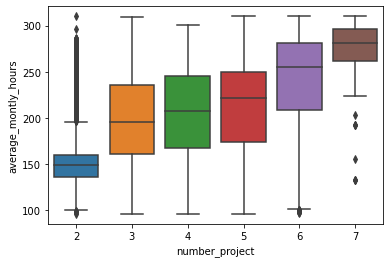

In [15]:
import seaborn as sns 

sns.boxplot(x = 'number_project', y = 'average_montly_hours', data = hr)

In [16]:
mean_per_project = hr.groupby('number_project').average_montly_hours.mean()
mean_per_project = dict(mean_per_project)
print(mean_per_project)

{2: 160.16353543979506, 3: 197.47882323104236, 4: 205.07858315740089, 5: 211.99962839093274, 6: 238.73947368421054, 7: 276.015873015873}


In [17]:
fill_values = hr.number_project.map(mean_per_project)
hr.average_montly_hours = hr.average_montly_hours.fillna(fill_values)

In [18]:
hr.isnull().sum() / len(hr) * 100

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
work_accident            0.0
left                     0.0
promotion_last_5years    0.0
department               0.0
salary                   0.0
dtype: float64

In [19]:
assert hr.isnull().sum().sum() == 0

In [20]:
hr.left = hr.left.map({'no': 0, 'yes': 1})
hr = pd.get_dummies(hr)
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [21]:
hr.to_csv('G:\data\datasets\processed_hr_data.csv', index = False)

In [22]:
hr1 = pd.read_csv('G:\data\datasets\processed_hr_data.csv')

In [23]:
hr1.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157.000000,3.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262.000000,6.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272.000000,4.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223.000000,5.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,160.163535,3.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,0.41,0.50,2,160.163535,3.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,0.10,0.77,6,247.000000,4.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
7,0.92,0.85,5,259.000000,5.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,0.89,1.00,5,224.000000,5.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,0.42,0.53,2,142.000000,3.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


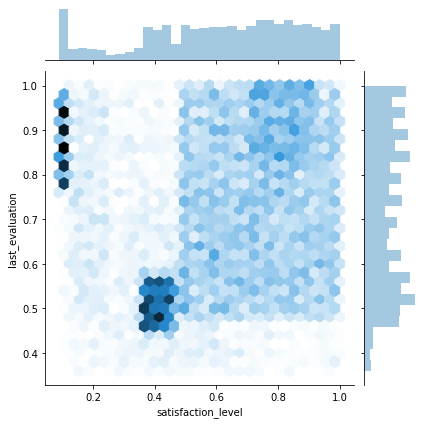

In [24]:
sns.jointplot('satisfaction_level', 'last_evaluation', data = hr1, kind = 'hex')

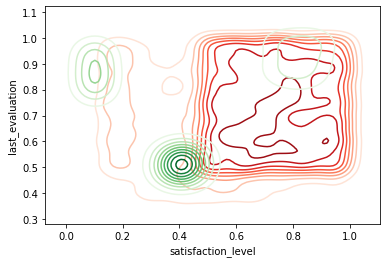

In [25]:
import seaborn as sns 

plot_args = dict(shape = True, shade_lowest = False)
for i, c in zip((0, 1), ('Reds', 'Greens')):
    sns.kdeplot(hr1.loc[hr1.left == i, 'satisfaction_level'], hr1.loc[hr1.left == i, 'last_evaluation'], cmap = c, **plot_args)

In [26]:
from sklearn.model_selection import train_test_split
features = ['satisfaction_level', 'last_evaluation']
x_train, x_test, y_train, y_test = train_test_split(hr1[features].values, hr1['left'].values, test_size = 0.3, random_state = 1)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [28]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C = 1, random_state=1)
svm.fit(x_train_std, y_train)

SVC(C=1, kernel='linear', random_state=1)

In [29]:
from sklearn.metrics import accuracy_score
y_pred = svm.predict(x_test_std)
acc = accuracy_score(y_test, y_pred)
print('accuracy = {:.1f}%'.format(acc*100))


accuracy = 75.9%


In [30]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test, y_pred)
scores = cmat.diagonal() / cmat.sum(axis = 1) * 100
print('left = 0: {:.2f}%'.format(scores[0]))
print('left = 1: {:.2f}%'.format(scores[1]))


left = 0: 100.00%
left = 1: 0.00%


<AxesSubplot:>

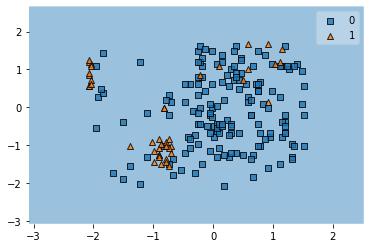

In [31]:
from mlxtend.plotting import plot_decision_regions
N_samples = 200
x, y = x_train_std[:N_samples], y_train[:N_samples]
plot_decision_regions(x, y, clf = svm)

In [32]:
from sklearn.neighbors import KNeighborsClassifier


In [33]:
#training a random forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=1)
forest.fit(x_train, y_train)


RandomForestClassifier(max_depth=5, n_estimators=50, random_state=1)


#install graphviz - difficult to install at times

In [36]:
df = pd.read_csv('G:\data\datasets\processed_hr_data.csv')

In [37]:
features = ['satisfaction_level', 'last_evaluation']
x = df[features].values
y = df.left.values

In [38]:
clf = RandomForestClassifier(n_estimators=100, max_depth=5)

In [42]:
from sklearn.model_selection import cross_val_score
import numpy as np
np.random.seed(1)
scores = cross_val_score(estimator=clf, X= x, y = y, cv = 10)
print('Accuracy = {:.3f} (+/-) {:.3f}'.format(scores.mean(), scores.std()))

Accuracy = 0.923 (+/-) 0.005


In [45]:
print(scores)

[0.934      0.91533333 0.92266667 0.91866667 0.92133333 0.92866667
 0.91933333 0.92       0.928      0.92128085]


In [51]:
from sklearn.model_selection import validation_curve
clf = RandomForestClassifier(n_estimators=10)
max_depths = np.arange(3, 16, 3)
train_scores, test_scores = validation_curve(estimator = clf, X = x, y = y, param_name='max_depth', param_range=max_depths, cv = 10)